# Illustration of the ~2/3 bootstrap sampling rule

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Function to estimate the proportion of unique elements in a bootstrap sample
def bootstrap_unique_fraction(n, num_simulations=10000):
    unique_fractions = []
    
    for _ in range(num_simulations):
        original_data = np.arange (n)
        sample =np.random.choice(original_data, size=n, replace=True)
        unique_count = len(set(sample))
        unique_fractions.append(unique_count/n)
    
    return np.mean(unique_fractions), unique_fractions

# Run simulation
n = 100  
mean_unique_fraction, unique_fractions = bootstrap_unique_fraction(n)

Estimated fraction of unique elements in a bootstrap sample: 0.6339


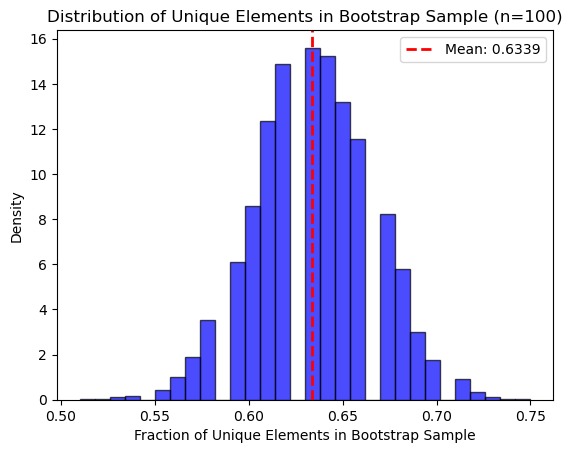

In [2]:
# Print the estimated fraction of unique elements
print(f"Estimated fraction of unique elements in a bootstrap sample: {mean_unique_fraction:.4f}")

# Plot the distribution of unique element fractions
plt.hist(unique_fractions, bins=30, density=True, alpha=0.7, color='b', edgecolor='black')
plt.axvline(mean_unique_fraction, color='r', linestyle='dashed', linewidth=2, label=f"Mean: {mean_unique_fraction:.4f}")
plt.xlabel("Fraction of Unique Elements in Bootstrap Sample")
plt.ylabel("Density")
plt.title(f"Distribution of Unique Elements in Bootstrap Sample (n={n})")
plt.legend()
plt.show()

# Decision tree vs. bagging on synthetic "moon" data

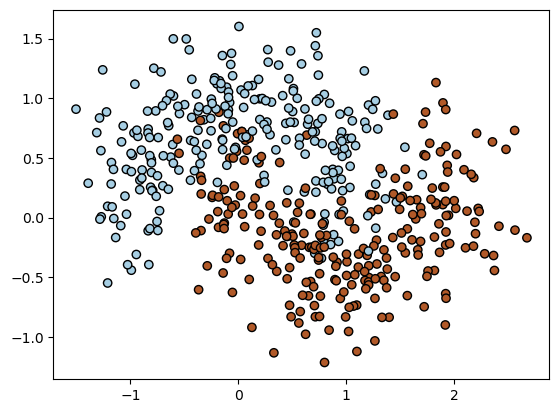

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_moons
from sklearn.metrics import accuracy_score

# Generate a toy dataset
X, y = make_moons(n_samples = 500, noise = 0.3, random_state=808)
plt.scatter(X[:,0],X[:,1], c=y, cmap=plt.cm.Paired, edgecolor='k')

Binary dataset that kind of forms two crescent moons

Why useful: Not a linear decision boundary

In [5]:
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.3, random_state=808)

# Train a Single Decision Tree
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
tree_preds = tree.predict(X_test)

# Train a Bagging Ensemble of Decision Trees
bagging = BaggingClassifier(
            estimator = DecisionTreeClassifier(),
            n_estimators = 50, # 50 trees in our bag 
            bootstrap = True, 
            random_state=808) 

bagging.fit(X_train, y_train)

bagging_preds = bagging.predict(X_test)


# Compare Accuracy
print(f"Decision Tree Accuracy: {accuracy_score(y_test, tree_preds):.3f}")
print(f"Bagging Accuracy: {accuracy_score(y_test, bagging_preds):.3f}")

Decision Tree Accuracy: 0.860
Bagging Accuracy: 0.887


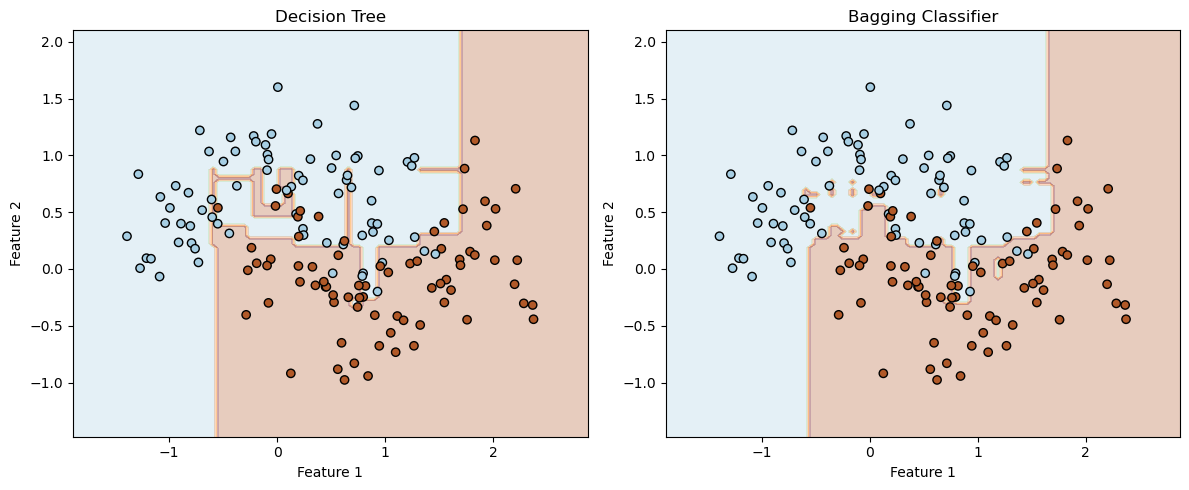

In [6]:
# Function to plot decision boundaries
def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.Paired)
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
### Plot Decision Boundaries for Decision Tree and Bagging
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plot_decision_boundary(tree, X_test, y_test, "Decision Tree")
plt.subplot(1, 2, 2)
plot_decision_boundary(bagging, X_test, y_test, "Bagging Classifier")
plt.tight_layout()
plt.show()